In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits import mplot3d

In [38]:
import os

In [39]:
os.getcwd

<function nt.getcwd()>

In [40]:
cancer=pd.read_csv('C:/Users/colga/Downloads/wdbc.csv')

In [42]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [43]:
cancer['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [44]:
cancer['diagnosis']=cancer['diagnosis'].replace({
    "M": "Malgnant",
    "B": "Benign"

})

In [45]:
cancer['diagnosis'].value_counts(normalize=True) #normalize gives %age value else it will only give the numbers

diagnosis
Benign      0.627417
Malgnant    0.372583
Name: proportion, dtype: float64

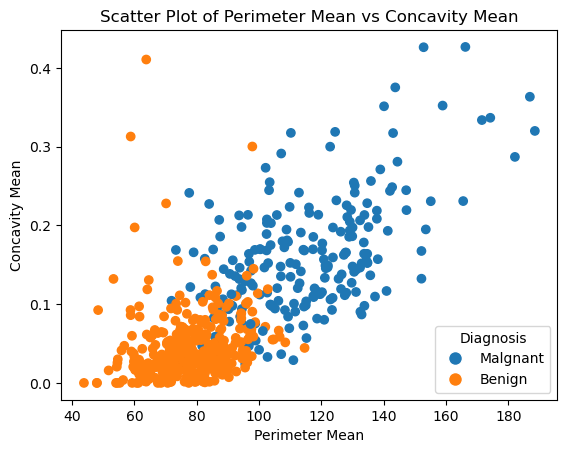

In [46]:
# Create mapping between values and colors
labels = cancer["diagnosis"].unique().tolist()
colors = list(mcolors.TABLEAU_COLORS.keys())
color_map = {l: colors[i % len(colors)] for i, l in enumerate(labels)}

# Plot
plt.scatter(cancer["perimeter_mean"], cancer['concavity_mean'],color=cancer["diagnosis"].map(color_map))

# Create custom legend handles
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=color_map[label])
           
           for label in labels]
plt.xlabel('Perimeter Mean')
plt.ylabel('Concavity Mean')
plt.title('Scatter Plot of Perimeter Mean vs Concavity Mean')
plt.legend(handles=handles, title='Diagnosis')
plt.show()

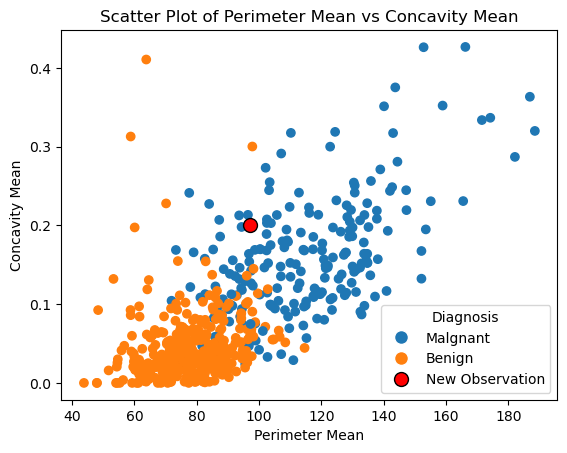

In [47]:
# Plot existing data
plt.scatter(cancer["perimeter_mean"], cancer['concavity_mean'], 
            color=cancer["diagnosis"].map(color_map))

# Create custom legend handles
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markersize=10, markerfacecolor=color_map[label])
           for label in labels]

# Add new observation
new_observation = {'perimeter_mean': 97, 'concavity_mean': 0.20}
plt.scatter(new_observation['perimeter_mean'], new_observation['concavity_mean'],
            color='red', edgecolor='black', s=100, label='New Observation')
# Add labels and legend
plt.xlabel('Perimeter Mean')
plt.ylabel('Concavity Mean')
plt.title('Scatter Plot of Perimeter Mean vs Concavity Mean')
plt.legend(handles=handles + [plt.Line2D([0], [0], marker='o', color='w', 
                                          markerfacecolor='red', markeredgecolor='black', 
                                          markersize=10, label='New Observation')], 
           title='Diagnosis')
plt.show()

In [52]:
new_obs_Perimeter=0.97
new_obs_Concavity=0.2
cancer['dist_from_new'] = (
(cancer['perimeter_mean'] - new_obs_Perimeter)**2 +
(cancer['concavity_mean'] - new_obs_Concavity)**2
)**(1/2)

In [53]:
#k = 5

nearest_5 = cancer.nsmallest(5, "dist_from_new")[[
    "perimeter_mean",
    "concavity_mean",
    "diagnosis",
    "dist_from_new"
]]

In [57]:
nearest_5['diagnosis'].value_counts(normalize=True)

diagnosis
Benign    1.0
Name: proportion, dtype: float64

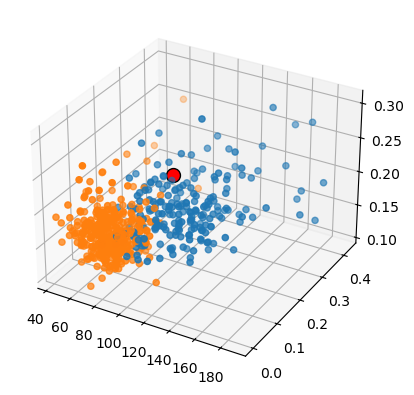

In [58]:
# Create mapping between values and colors
labels = cancer["diagnosis"].unique().tolist()
colors = list(mcolors.TABLEAU_COLORS.keys())
color_map = {l: colors[i % len(colors)] for i, l in enumerate(labels)}

# Create a 3D plot
ax = plt.axes(projection="3d")

# Plot data points with color corresponding to diagnosis
sc = ax.scatter3D(cancer['perimeter_mean'], cancer['concavity_mean'], cancer['symmetry_mean'], 
                  c=cancer['diagnosis'].map(color_map), marker='o')

# Define the new observation
new_observation = {'perimeter_mean': 97, 'concavity_mean': 0.20, 'symmetry_mean': 0.22}

# Plot the new observation
ax.scatter3D(new_observation['perimeter_mean'], new_observation['concavity_mean'], 
             new_observation['symmetry_mean'], color='red', edgecolor='black', 
             s=100, marker='o', label='New Observation')

In [59]:
#new observation
new_obs_Perimeter = 97
new_obs_Concavity = 0.2
new_obs_Symmetry = 0.22

cancer['dist_from_new'] = (
    (cancer['perimeter_mean'] - new_obs_Perimeter)**2 +
(cancer['concavity_mean'] - new_obs_Concavity)**2 +
(cancer['symmetry_mean'] - new_obs_Symmetry)**2
)**(1/2)
nearest_5 = cancer.nsmallest(5, 'dist_from_new')[[
    "perimeter_mean",
    "concavity_mean",
    "symmetry_mean",
    "diagnosis",
    "dist_from_new"
]]

In [60]:
nearest_5['diagnosis'].value_counts(normalize=True)

diagnosis
Malgnant    0.8
Benign      0.2
Name: proportion, dtype: float64

In [61]:
from sklearn import set_config
set_config(transform_output="pandas")

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
cancer_train=cancer[["diagnosis", "perimeter_mean", "concavity_mean"]]

In [64]:
knn = KNeighborsClassifier(n_neighbors=5)
knn

KNeighborsClassifier()

In [66]:
# predictor - x, response - y
X = cancer_train[["perimeter_mean","concavity_mean"]]
y = cancer_train["diagnosis"]
knn.fit(X,y)

KNeighborsClassifier()

In [67]:
new_obs = pd.DataFrame({"perimeter_mean": [97], "concavity_mean": [0.20]})
knn.predict(new_obs)

array(['Malgnant'], dtype=object)